# Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv('CO2 Emissions_Canada.csv')

# Separate features and target
X = df.drop(columns=['CO2 Emissions(g/km)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)'])
y = df[['CO2 Emissions(g/km)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']]


# EDA

In [4]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df['Make'].value_counts()


Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

In [7]:
df['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


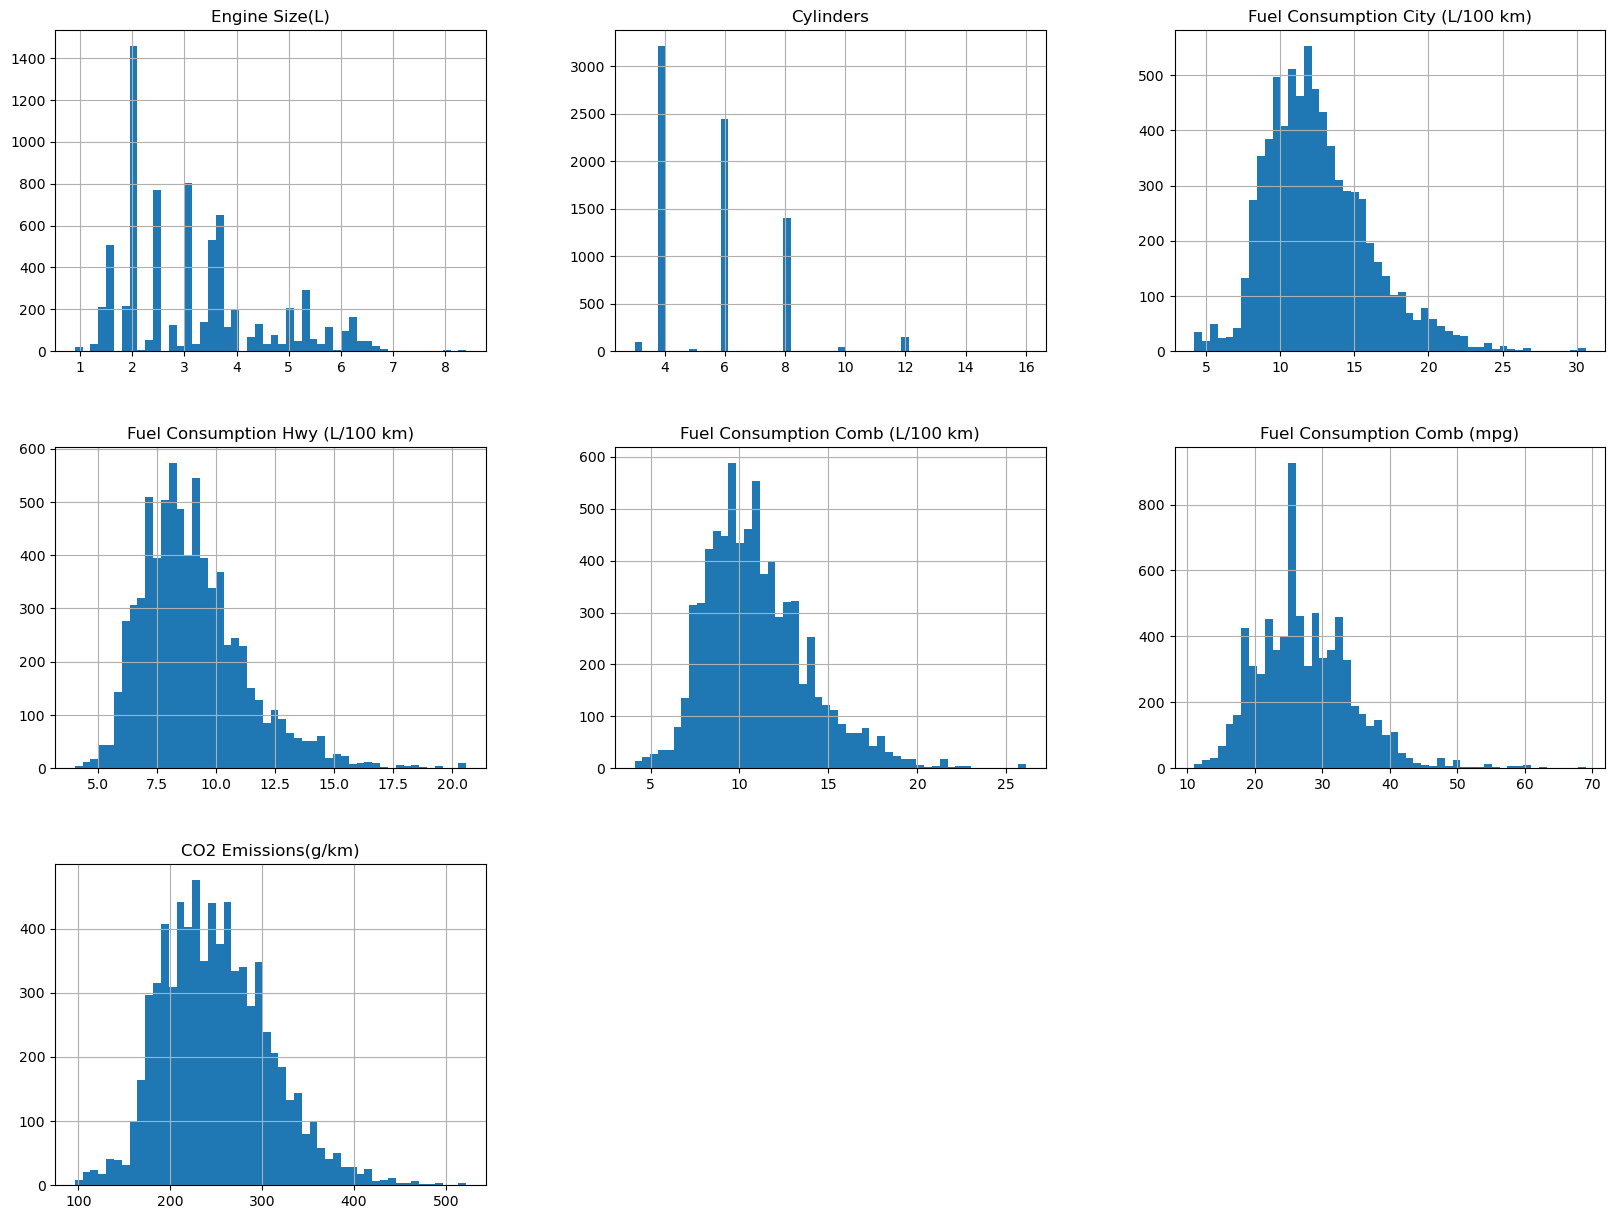

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

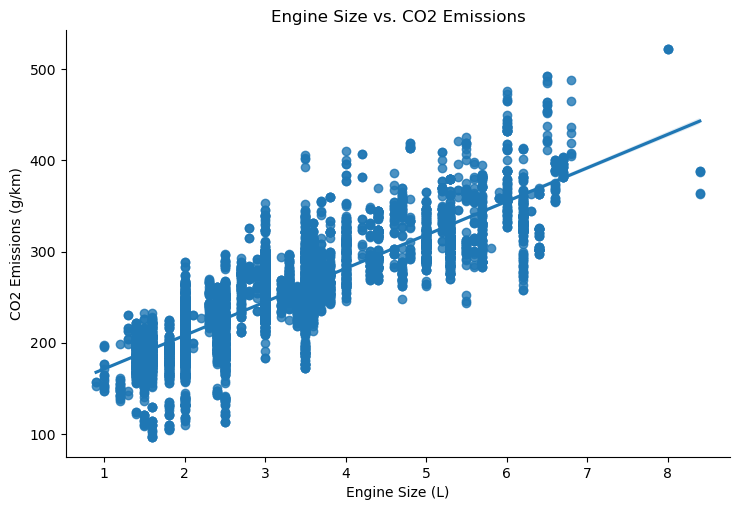

In [10]:
# Scatter plot with regression line
sns.lmplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df, aspect=1.5)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()


# Preprocessing

In [12]:
# Check datatypes
print(df.dtypes)


Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("Missing Values:\n", missing_values[missing_values > 0])


No missing values in the dataset.


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Preprocessing pipeline
# 1. Categorical features: One-Hot Encoding
# 2. Numerical features: Imputation and Scaling

categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
numerical_cols = ['Engine Size(L)', 'Cylinders']

# Define preprocessor for columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])


# Modeling (it is a multi output regression problem)

In [5]:
# Split data into train and test sets (random splitting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reuse the existing preprocessor
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Use the same preprocessor as in the initial code
    ('regressor', LinearRegression())
])

# Train and evaluate
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics and accuracy
print("Simple Linear Regression with Preprocessing Results:")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')
print(f'Accuracy: {r2 * 100:.2f}%')

# Print predicted and actual values for some test cases along with car details
print("\nPredicted vs Actual for some test cases:")
for i in range(5):  # Print first 5 test cases
    car_details = X_test.iloc[i][['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']].to_dict()
    print(f"\nCar Details: {car_details}")
    for j, column in enumerate(y_test.columns):
        print(f"Predicted {column}: {y_pred[i][j]}, Actual {column}: {y_test.iloc[i][column]}")

Simple Linear Regression with Preprocessing Results:
Mean Absolute Error (MAE): 2.2845799489608076
Mean Squared Error (MSE): 40.0201709687379
R² Score: 0.9418870686464252
Accuracy: 94.19%

Predicted vs Actual for some test cases:

Car Details: {'Make': 'PORSCHE', 'Model': 'Panamera 4 Executive', 'Vehicle Class': 'FULL-SIZE', 'Transmission': 'AM8', 'Fuel Type': 'Z'}
Predicted CO2 Emissions(g/km): 252.99502334433015, Actual CO2 Emissions(g/km): 253.0
Predicted Fuel Consumption City (L/100 km): 12.400080561661696, Actual Fuel Consumption City (L/100 km): 12.4
Predicted Fuel Consumption Hwy (L/100 km): 8.999907777128424, Actual Fuel Consumption Hwy (L/100 km): 9.0
Predicted Fuel Consumption Comb (L/100 km): 10.899656304082455, Actual Fuel Consumption Comb (L/100 km): 10.9
Predicted Fuel Consumption Comb (mpg): 26.000086105989293, Actual Fuel Consumption Comb (mpg): 26.0

Car Details: {'Make': 'BMW', 'Model': 'M6 CABRIOLET', 'Vehicle Class': 'SUBCOMPACT', 'Transmission': 'AM7', 'Fuel Type':

MAE
The average difference between predicted and actual values.
A low MAE (like 2.28) indicates the model predictions are close to the actual values.

MSE
The average of the squared differences between predicted and actual values.
Squaring emphasizes larger errors, and a low MSE (40.01) shows the model is performing well.

R2 score
Indicates how much of the variance in the target variable is explained by the model.
An R2 score of 0.941 is excellent, meaning the model explains about 99% of the variance.

Accuracy
The percentage representation of the R2 score
At 94.19%, it confirms the model is highly accurate.


In [19]:
# For Make, Transmission, and Vehicle Class, we want to print top 5 features
print("\nTop 5 Most Important Features for Make, Transmission, and Vehicle Class:")

numerical_feature_names = numerical_cols
categorical_feature_names = preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(categorical_cols)

feature_names = numerical_feature_names + list(categorical_feature_names)

importance = lr_pipeline.named_steps['regressor'].coef_.flatten()

# Filter by the categorical columns and sort the importance values
for cat_col in ['Make', 'Transmission', 'Vehicle Class']:
    # Get the features related to the current categorical column
    relevant_features = [f for f in feature_names if f.startswith(cat_col)]
    
    if relevant_features:  # Check if there are any features for the category
        # Get the corresponding importance values
        relevant_importance = importance[[i for i, f in enumerate(feature_names) if f in relevant_features]]
        
        # Combine and sort the features by importance (descending order)
        sorted_relevant_features = sorted(zip(relevant_features, relevant_importance), key=lambda x: x[1], reverse=True)
        
        # Print the top 5 important features for the current category
        print(f"\nTop 5 Important Features for {cat_col}:")
        for feature, imp in sorted_relevant_features[:5]:
            print(f"{feature}: {imp}")
    else:
        print(f"\nNo features found for {cat_col}.")



Top 5 Most Important Features for Make, Transmission, and Vehicle Class:

Top 5 Important Features for Make:
Make_BUGATTI: 91.34885118188072
Make_LAMBORGHINI: 73.48132777063122
Make_BENTLEY: 59.82804670335007
Make_MASERATI: 50.96953693344099
Make_ROLLS-ROYCE: 47.749230200545696

Top 5 Important Features for Transmission:
Transmission_A5: 15.78468204710167
Transmission_M7: 8.772355226412708
Transmission_AM9: 8.537692972469232
Transmission_M6: 8.313522246702087
Transmission_A6: 7.937105009098784

Top 5 Important Features for Vehicle Class:
Vehicle Class_VAN - PASSENGER: 80.4003953794186
Vehicle Class_VAN - CARGO: 49.925355251045794
Vehicle Class_PICKUP TRUCK - SMALL: 31.489307649763603
Vehicle Class_PICKUP TRUCK - STANDARD: 19.88582157634711
Vehicle Class_MINIVAN: 13.791317732906


In [20]:
# For feature importance from Linear Regression (based on coefficients)
print("\nFeature Importance (Linear Regression - Coefficients):")

# Get feature names from the preprocessor and the model's coefficients
feature_names = numerical_cols + list(preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(categorical_cols))
importance = lr_pipeline.named_steps['regressor'].coef_

# Combine features and importance into a list of tuples
features_importance = list(zip(feature_names, importance.flatten()))

# Sort by importance in descending order
features_importance.sort(key=lambda x: x[1], reverse=True)

# Print top 20 sorted feature importance (coefficients for linear regression)
for feature, imp in features_importance[:20]:
    print(f"{feature}: {imp}")



Feature Importance (Linear Regression - Coefficients):
Model_AMG G 65: 140.57603442809565
Model_GT: 122.62971597948302
Model_Sequoia 4WD: 109.17674125787401
Model_SEQUOIA 4WD: 107.68035455909971
Model_G 63 AMG: 106.76398984813932
Model_AMG G 63: 105.85709496097202
Model_G 550: 104.65285372615945
Model_LX 570: 92.64531020055357
Make_BUGATTI: 91.34885118188072
Model_X3 M Competition: 90.13256447837385
Model_X4 M: 90.13256447837385
Model_X4 M Competition: 90.13256447837385
Model_ARMADA 4WD: 87.8975511866753
Model_Shelby GT500 Mustang: 87.2650162125399
Model_4Runner 4WD: 83.56080790584943
Model_Grand Cherokee 4X4 Trackhawk: 81.75988717942829
Vehicle Class_VAN - PASSENGER: 80.4003953794186
Model_GL 350 BLUETEC 4MATIC: 79.31650941696668
Model_4Runner 4WD (Part-Time 4WD): 77.04254072993795
Model_EXPEDITION EL 4X4: 76.204917750703


In [13]:
import pandas as pd

# Function to get the importance for specific categories
def aggregate_importance_by_category(importance, feature_names, categories):
    category_importance = {category: 0 for category in categories}
    
    for feature, imp in zip(feature_names, importance.flatten()):
        for category in categories:
            if category in feature:
                category_importance[category] += abs(imp)
                
    return category_importance

# Define categories for aggregation
categories = ['Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders', 'Transmission', 'Fuel Type']

# Get the feature names and importance from the model
feature_names = numerical_cols + list(preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(categorical_cols))
importance = lr_pipeline.named_steps['regressor'].coef_

# Aggregate the importance for the defined categories
category_importance = aggregate_importance_by_category(importance, feature_names, categories)

# Convert to a pandas dataframe for easy display
category_importance_df = pd.DataFrame(list(category_importance.items()), columns=['Category', 'Total Importance'])

# Sort the results by importance in descending order
category_importance_df = category_importance_df.sort_values(by='Total Importance', ascending=False)

# Print the results
print("\nFeature Importance by Category:")
print(category_importance_df)



Feature Importance by Category:
        Category  Total Importance
1          Model      39891.221940
0           Make        919.108250
2  Vehicle Class        390.984395
5   Transmission        167.910089
3    Engine Size         27.324831
6      Fuel Type         24.651008
4      Cylinders          4.231510


# Try different models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor

# List of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Split data into train and test sets (random splitting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reuse the existing preprocessor
for model_name, model in models.items():
    # Wrap the model in MultiOutputRegressor for multi-output regression
    multi_output_model = MultiOutputRegressor(model, n_jobs=-1)
    
    # Create the pipeline for each model
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Use the same preprocessor as in the initial code
        ('regressor', multi_output_model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation results
    print(f"\n{model_name} Results:")
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R² Score: {r2}')



Linear Regression Results:
Mean Absolute Error (MAE): 2.284824590343115
Mean Squared Error (MSE): 40.012734095947295
R² Score: 0.9418920628806621

Random Forest Results:
Mean Absolute Error (MAE): 1.6707964718885264
Mean Squared Error (MSE): 24.882633596650585
R² Score: 0.9609936828232314

K-Nearest Neighbors Results:
Mean Absolute Error (MAE): 2.553871360866622
Mean Squared Error (MSE): 40.73309524712254
R² Score: 0.932375951345608

Decision Tree Results:
Mean Absolute Error (MAE): 1.573895154270239
Mean Squared Error (MSE): 27.125250292051824
R² Score: 0.9554330376932765


# Tune models

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
import numpy as np

warnings.simplefilter("ignore", category=UserWarning)

# List of regression models with hyperparameter grids to tune
models = {
    "Linear Regression": {
        'model': LinearRegression(),
        'params': {}  # LinearRegression doesn't require tuning
    },
    "Random Forest": {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'regressor__estimator__n_estimators': [50, 100],
            'regressor__estimator__max_depth': [None, 10, 20],
            'regressor__estimator__min_samples_split': [2, 5]
        }
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsRegressor(),
        'params': {
            'regressor__estimator__n_neighbors': [3, 5],
            'regressor__estimator__weights': ['uniform', 'distance'],
            'regressor__estimator__algorithm': ['brute']  # Force brute force search
        }
    },
    "Decision Tree": {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'regressor__estimator__max_depth': [None, 10, 20],
            'regressor__estimator__min_samples_split': [2, 5, 10],
            'regressor__estimator__min_samples_leaf': [1, 2, 4]
        }
    },
    "XGBoost": {
        'model': XGBRegressor(random_state=42),
        'params': {
            'regressor__estimator__n_estimators': [50, 100],
            'regressor__estimator__learning_rate': [0.1, 0.2],
            'regressor__estimator__max_depth': [3, 6]
        }
    }
}

# Split data into train and test sets (random splitting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through each model, apply grid search for hyperparameter tuning, and evaluate
best_models = {}
for model_name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    
    # Wrap the model in MultiOutputRegressor for multi-output regression
    multi_output_model = MultiOutputRegressor(model, n_jobs=-1)
    
    # Create the pipeline for each model
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Use the same preprocessor as in the initial code
        ('regressor', multi_output_model)
    ])
    
    # Apply GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Get the best model after tuning
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    
    # Make predictions using the best model
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation results
    print(f"\n{model_name} Results after Hyperparameter Tuning:")
    print(f"Best Params: {grid_search.best_params_}")
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R² Score: {r2}')
    
# Now, you can train the model with the best hyperparameters
# Choose the best model (lowest error or highest R²)
best_model_name = max(best_models, key=lambda k: best_models[k].score(X_test, y_test))

best_model_final = best_models[best_model_name]
best_model_final.fit(X_train, y_train)

# Make predictions
y_pred_final = best_model_final.predict(X_test)

# Final evaluation
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

# Print final evaluation results
print(f"\nFinal Results for the Best Model ({best_model_name}):")
print(f'Mean Absolute Error (MAE): {mae_final}')
print(f'Mean Squared Error (MSE): {mse_final}')
print(f'R² Score: {r2_final}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits

Linear Regression Results after Hyperparameter Tuning:
Best Params: {}
Mean Absolute Error (MAE): 2.284824590343115
Mean Squared Error (MSE): 40.012734095947295
R² Score: 0.9418920628806621
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Random Forest Results after Hyperparameter Tuning:
Best Params: {'regressor__estimator__max_depth': None, 'regressor__estimator__min_samples_split': 2, 'regressor__estimator__n_estimators': 100}
Mean Absolute Error (MAE): 1.6707964718885264
Mean Squared Error (MSE): 24.882633596650585
R² Score: 0.9609936828232314
Fitting 5 folds for each of 4 candidates, totalling 20 fits

K-Nearest Neighbors Results after Hyperparameter Tuning:
Best Params: {'regressor__estimator__algorithm': 'brute', 'regressor__estimator__n_neighbors': 3, 'regressor__estimator__weights': 'distance'}
Mean Absolute Error (MAE): 1.6452575517420829
Mean Squared Error (MSE): 24.641744031345503
R² Score: 0.957737114

# Ensemble

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Define the models using best parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
xgboost = XGBRegressor(learning_rate=0.2, n_estimators=100, max_depth=6, random_state=42)

# Create the ensemble model using MultiOutputRegressor
ensemble_model = MultiOutputRegressor(
    VotingRegressor(
        estimators=[
            ('Random Forest', random_forest),
            ('XGBoost', xgboost)
        ]
    )
)

# Build the pipeline: preprocessing -> ensemble model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ensemble_model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("\nEnsemble Model Results:")
print(f"Mean Absolute Error (MAE): {mae_ensemble}")
print(f"Mean Squared Error (MSE): {mse_ensemble}")
print(f"R² Score: {r2_ensemble}")


voting type of ensemble is hard voting because in the case of regression, the prediction is the average, which is equivalent to "hard" voting
ensemble of 2 tree based models didn't imrpove our result (result is not better than individual random forest model)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Define the models using best parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
# Define the K-Nearest Neighbors model
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')

# Create the ensemble model using VotingRegressor
ensemble_model = MultiOutputRegressor(
    VotingRegressor(
        estimators=[
            ('Random Forest', random_forest),
            ('K-Nearest Neighbors', knn)
        ]
    )
)

# Build the pipeline: preprocessing -> ensemble model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ensemble_model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("\nEnsemble Model Results:")
print(f"Mean Absolute Error (MAE): {mae_ensemble}")
print(f"Mean Squared Error (MSE): {mse_ensemble}")
print(f"R² Score: {r2_ensemble}")



Ensemble Model Results:
Mean Absolute Error (MAE): 1.5819024552978267
Mean Squared Error (MSE): 21.39892858876901
R² Score: 0.9659614892316432
